<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/Esercizio_in_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

1. Il file weather.csv contiene informazioni sul meteo di alcune città australiane. Caricare il suo contenuto in un dataframe.

   Quante righe e quante colonne ci sono nel dataset?

   Ci sono valori mancanti?

In [19]:
df = pd.read_csv("weather.csv",sep=";")
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


In [7]:
row_count = df.shape[0]
row_count

14468

In [8]:
cols_count = df.shape[1]
cols_count

17

In [21]:
df.isnull().sum()
#df.isnull().sum().sum() facendo 2 volte la somma vedo per tutte le feature

,0
Month,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


2. Aggiungere al dataset:

- una nuova colonna "temp_diff" con la differenza in valore assoluto tra i valori di temperatura alle 9 del mattino e le 3 del pomeriggio

- una nuova colonna "hum_diff" con la differenza in valore assoluto tra i valori di umidità alle 9 del mattino e le 3 del pomeriggio

In [22]:
df["temp_diff"]=abs(df['Temp9am']-df['Temp3pm'])
df["hum_diff"] =abs(df['Humidity9am']-df['Humidity3pm'])

In [23]:
df

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No,5.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,Yes,No,7.5,36
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,No,No,4.3,24
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,No,No,7.7,11
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,No,No,6.9,7


3. Selezionare soltanto le righe in cui "temp_diff" è maggiore di 10 e "hum_diff" è maggiore di 20. Qual è la location in cui si verifica più spesso questa elevata escursione termica (ovvero la location con il maggior numero di righe nella selezione)?

In [24]:
df.loc[(df['temp_diff'] > 10) & (df['hum_diff'] >= 20)]

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No,10.6,29
9,1,Albury,17.8,37.0,0.0,41,9,17,54,17,1016.6,1012.6,-1,26.2,36.2,No,No,10.0,37
10,1,Albury,17.7,39.2,0.0,56,9,7,46,13,1011.6,1007.5,8,26.0,37.0,No,No,11.0,33
12,1,Albury,20.2,43.0,0.0,72,15,24,51,16,1013.8,1007.5,-1,27.9,42.3,No,No,14.4,35
18,1,Albury,16.1,40.0,0.0,50,7,19,46,15,1015.5,1009.4,5,24.3,37.6,No,No,13.3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,9,Uluru,7.6,28.7,0.0,54,13,35,59,20,1015.8,1010.2,1,14.8,27.7,No,No,12.9,39
14364,9,Uluru,5.9,29.4,0.0,54,9,30,52,15,1010.7,1003.7,1,15.3,28.4,No,No,13.1,37
14414,11,Uluru,17.5,35.5,0.0,46,19,9,46,15,1009.8,1005.4,-1,22.0,33.7,No,No,11.7,31
14426,11,Uluru,18.2,39.6,0.0,33,17,19,34,10,1010.1,1004.4,-1,27.9,38.4,No,No,10.5,24


In [35]:
df.loc[(df['temp_diff'] > 10) & (df['hum_diff'] >= 20)].groupby(df["Location"]).size()
#così facendo per ogni location mi ritorna il numero di occorrenze soddisfano la condizione

,0
Location,
Adelaide,11
Albury,54
AliceSprings,25
BadgerysCreek,51
Ballarat,20
Bendigo,43
Brisbane,1
Canberra,64
Cobar,4


In [36]:
df.loc[(df['temp_diff'] > 10) & (df['hum_diff'] >= 20)].groupby(df["Location"]).size().idxmax()
#con idx max mi ritorna l'indice con il maggior numero di occorrenze

'Richmond'

4. Quante location sono presenti nel file?

In [41]:
df.groupby(df["Location"]).size().shape[0] #il size() lo uso solo per convertire l'oggetto da dataframegroupby a dataframe in modo da potergli applicare sopra shape[0]

42

5. Trasformare i valori della colonna "RainToday" convertendo "yes" in 1 e "no" in 0. Utilizzando il metodo groupby calcolare per ogni location il numero di giorni di pioggia.

In [44]:
map_rain = {
    "yes":1,
    "no":0
}
df['RainToday'] = df['RainToday'].str.lower().map(map_rain)

In [45]:
df

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,No,5.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,No,7.5,36
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,No,4.3,24
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,No,7.7,11
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,No,6.9,7


In [46]:
df['RainToday'].groupby(df["Location"]).sum()

,RainToday
Location,
Adelaide,90
Albury,88
AliceSprings,39
BadgerysCreek,57
Ballarat,110
Bendigo,90
Brisbane,75
Cairns,88
Canberra,81


6. Creare una tabella pivot in cui per ogni location (sulle righe) e per ogni mese (sulle colonne) sia calcolata la temperatura massima media.

In [48]:
df.pivot_table(index='Location',values='MaxTemp',columns='Month',aggfunc='mean')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,31.190323,29.289655,28.641935,24.826667,19.793548,16.043333,15.283871,17.658065,17.420000,20.993548,24.706667,28.658065
Albury,31.487097,32.441379,30.790323,25.810000,18.077419,13.423333,13.280645,15.248387,16.823333,19.667742,25.586667,30.500000
AliceSprings,34.858065,37.179310,35.148387,31.824138,25.370000,20.690000,21.080000,22.638710,24.620000,30.516667,35.383333,34.532000
BadgerysCreek,28.792857,30.251724,29.412903,26.246667,23.225806,18.106667,18.483871,18.716129,21.093103,24.477419,29.734483,32.369231
Ballarat,26.934483,26.288889,24.796667,20.093333,14.925806,10.551724,10.151613,11.803226,13.190000,15.556667,19.276667,24.596667
Bendigo,30.100000,30.881481,28.996774,23.186667,17.045161,12.746667,12.812903,14.251613,15.520000,18.925806,24.383333,28.664516
Brisbane,30.374074,32.303846,29.929032,28.783333,26.983871,21.526667,22.464516,23.153333,24.880000,27.083871,30.388889,30.058065
Cairns,32.116667,33.248276,31.761290,30.431034,28.636842,27.413333,26.977419,26.600000,28.300000,30.100000,31.939130,32.150000
Canberra,28.541935,29.306897,27.690323,23.880000,17.326667,13.013333,12.741935,14.258065,15.793333,18.477419,25.425926,28.716667


7. Visualizzare in un unico grafico la distribuzione dei valori di temperatura massima nel mese di maggio (5) e dicembre (12).

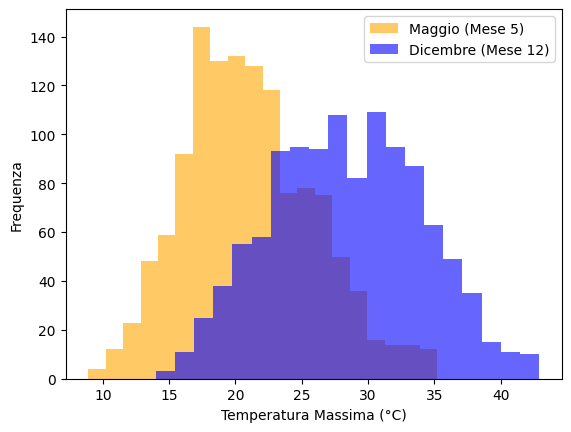

In [59]:
#Selezionare i dati per MaxTemp nei mesi specifici
temp_maggio = df[df['Month'] == 5]['MaxTemp']
temp_dicembre = df[df['Month'] == 12]['MaxTemp']
#alpha setta la trasparenza, necessaria siccome sono sovrapposti
plt.hist(temp_maggio, bins=20, alpha=0.6, label='Maggio (Mese 5)', color='orange')
plt.hist(temp_dicembre, bins=20, alpha=0.6, label='Dicembre (Mese 12)', color='blue')
plt.xlabel('Temperatura Massima (°C)')
plt.ylabel('Frequenza')
plt.legend()

8. Visualizzare in uno scatterplot la relazione tra i valori di pressione e i valori di umidità (fare 2 plot distinti nella stessa figura, uno per i valori 9am e un altro per i valori 3pm). Colorare i punti di due colori diversi in base ai valori di RainToday.

Text(0, 0.5, 'Pressione')

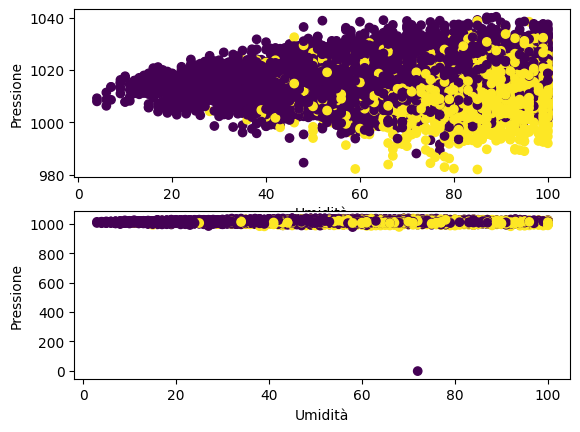

In [54]:
plt.subplot(2,1,1)
plt.scatter(df['Humidity9am'],df['Pressure9am'],c=df['RainToday'])
plt.xlabel('Umidità')
plt.ylabel('Pressione')
plt.subplot(2,1,2)
plt.scatter(df['Humidity3pm'],df['Pressure3pm'],c=df['RainToday'])
plt.xlabel('Umidità')
plt.ylabel('Pressione')